<a href="https://colab.research.google.com/github/hualei-hualei/ML2021/blob/main/cnn_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
PyTorch Quickstart

In [3]:
!pip3 install torch==1.2.0+cu92 torchvision==0.4.0+cu92 -f https://download.pytorch.org/whl/torch_stable.html

Looking in links: https://download.pytorch.org/whl/torch_stable.html
  Using cached https://download.pytorch.org/whl/cu92/torch-1.2.0%2Bcu92-cp37-cp37m-manylinux1_x86_64.whl (663.1 MB)
     |████████████████████████████████| 8.8 MB 21.5 MB/s 
  Attempting uninstall: torch
    Found existing installation: torch 1.10.0+cu111
    Uninstalling torch-1.10.0+cu111:
      Successfully uninstalled torch-1.10.0+cu111
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.11.1+cu111
    Uninstalling torchvision-0.11.1+cu111:
      Successfully uninstalled torchvision-0.11.1+cu111
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchtext 0.11.0 requires torch==1.10.0, but you have torch 1.2.0+cu92 which is incompatible.
torchaudio 0.10.0+cu111 requires torch==1.10.0, but you have torch 1.2.0+cu92 which is incompatible.


In [10]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms

In [6]:
print(torch.__version__)

1.2.0+cu92


In [11]:
BATCH_SIZE = 32

transform = transforms.Compose([transforms.ToTensor()])
## download training set
trainset = torchvision.datasets.MNIST(root = './data', train = True, download=True, transform = transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=BATCH_SIZE, shuffle = True, num_workers=2)

## download test data
testset = torchvision.datasets.MNIST(root = './data', train = False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=BATCH_SIZE, shuffle = False, num_workers=2)

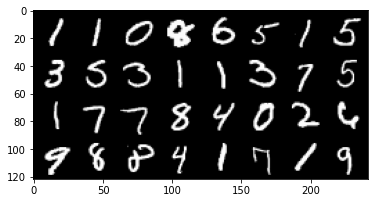

In [12]:
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

## get some training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

## show images
imshow(torchvision.utils.make_grid(images))

In [13]:
for images, labels in trainloader:
    print('Image batch dimensions: ', images.shape)
    print('Image label dimensions: ', labels.shape)
    break

Image batch dimensions:  torch.Size([32, 1, 28, 28])
Image label dimensions:  torch.Size([32])


In [16]:
class MyModel(nn.Module):
    def __init__(self):
        super(MyModel, self).__init__()

        ## 28x28x1 => 26x26x32
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3)
        self.d1 = nn.Linear(26 * 26 * 32, 128)
        self.d2 = nn.Linear(128, 10)

    def forward(self, x):
        # 32 x 1 x 28 x 28 => 32 x 32x 26 x26
        x = self.conv1(x)
        x = F.relu(x)

        # flatten => 32 x (32 x 26 x 26)
        x = x.flatten(start_dim = 1)

        # 32 x (32 x 26 x 26) => 32 x 128
        x = self.d1(x)
        x = F.relu(x)

        # logits => 32 x 10
        logits = self.d2(x)
        out = F.softmax(logits, dim = 1)
        return out

In [18]:
# test the model with 1 batch
model = MyModel()
for images, label in trainloader:
    print('batch size: ', images.shape)
    out  = model(images)
    print(out.shape)
    break

batch size:  torch.Size([32, 1, 28, 28])
torch.Size([32, 10])


In [19]:
## train the model
learning_rate = 0.001
num_epochs = 5

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
model = MyModel()
model = model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

In [20]:
## compute accuracy
def get_accuracy(logit, target, batch_size):
    "get accuracy for training round"
    corrects = (torch.max(logit, 1)[1].view(target.size()).data == target.data).sum()
    accuracy = 100.0 * corrects / BATCH_SIZE
    
    return accuracy.item()

In [24]:
## train the model
for epoch in range(num_epochs):
    train_running_loss = 0.0
    train_acc = 0.0

    model = model.train()

    # training step
    for i, (images, labels) in enumerate(trainloader):

        images = images.to(device)
        labels = labels.to(device)

        ## forward + backprop + loss
        logits = model(images)
        loss = criterion(logits, labels)
        optimizer.zero_grad()
        loss.backward()

        #update model params
        optimizer.step()

        train_running_loss += loss.detach().item()
        train_acc += get_accuracy(logits, labels, BATCH_SIZE)

        print('Epoch: %d | training round: %d DONE!' % (epoch, i))

    model.eval()
    print('Epoch: %d | Loss: %.4f | Train Accuracy: %.2f' %(epoch, train_running_loss / i, train_acc/i))

流式输出内容被截断，只能显示最后 5000 行内容。
Epoch: 2 | training round: 628 DONE!
Epoch: 2 | training round: 629 DONE!
Epoch: 2 | training round: 630 DONE!
Epoch: 2 | training round: 631 DONE!
Epoch: 2 | training round: 632 DONE!
Epoch: 2 | training round: 633 DONE!
Epoch: 2 | training round: 634 DONE!
Epoch: 2 | training round: 635 DONE!
Epoch: 2 | training round: 636 DONE!
Epoch: 2 | training round: 637 DONE!
Epoch: 2 | training round: 638 DONE!
Epoch: 2 | training round: 639 DONE!
Epoch: 2 | training round: 640 DONE!
Epoch: 2 | training round: 641 DONE!
Epoch: 2 | training round: 642 DONE!
Epoch: 2 | training round: 643 DONE!
Epoch: 2 | training round: 644 DONE!
Epoch: 2 | training round: 645 DONE!
Epoch: 2 | training round: 646 DONE!
Epoch: 2 | training round: 647 DONE!
Epoch: 2 | training round: 648 DONE!
Epoch: 2 | training round: 649 DONE!
Epoch: 2 | training round: 650 DONE!
Epoch: 2 | training round: 651 DONE!
Epoch: 2 | training round: 652 DONE!
Epoch: 2 | training round: 653 DONE!
Epoch: 2 | 

In [25]:
# compute accuracy on test set
test_acc = 0.0
for i, (images, labels) in enumerate(testloader, 0):
    images = images.to(device)
    labels = labels.to(device)
    outputs = model(images)
    test_acc += get_accuracy(outputs, labels, BATCH_SIZE)

print('Test accuracy: %.2f' % (test_acc / i))

Test accuracy: 98.20
